In [68]:
# Load 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import shutil
import os
import time
import subprocess
import sys
import datetime
from os.path import exists as file_exists
import matplotlib.dates as mdates
import math

# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

import numpy as np

# Parcels:

# Constants
labelfont = {'fontname':'Calibri'}
ticksize = 10
labelsize = 12
titlesize = 18

# FILE PATHS
data_file_path = r"C:\Users\govertsen.k\Northeastern University\Community Resilience in Extreme Temperatures - Data"
data_file_path = data_file_path.replace(os.sep, '/')

# Metadata
metadata = pd.read_csv(data_file_path + "/Outputs/Models_Worcester_Metadata.csv")

# Parcels 
tax_parcels = pd.read_csv(data_file_path + "/Vulnerability Mapping/WorcesterParcels.csv")
tax_parcels.columns
# tax_parcels['Heat type'].unique()
# col_to_keep = ["AYB","Family type","Bldg Style","Effective Area","Siding","Roof Cover"]
# tax_parcels = tax_parcels.loc[:,col_to_keep]

# #CLEAN
# #drop na
# tax_parcels = tax_parcels.dropna()
# # remove rows that have 0 for AYB
# tax_parcels = tax_parcels[tax_parcels.AYB != 0]
# # NONE for siding or roof
# tax_parcels = tax_parcels[tax_parcels.Siding != "NONE"]
# tax_parcels = tax_parcels[tax_parcels.Siding != "Typical"]
# tax_parcels = tax_parcels[tax_parcels['Roof Cover'] != "Typical"]
# tax_parcels = tax_parcels[tax_parcels['Roof Cover'] != "NONE"]
# tax_parcels = tax_parcels[tax_parcels['Effective Area'] != 0]# reduce single, two and three

# # merge Two Family and TWO FAMILY
# tax_parcels.loc[(tax_parcels['Family type'] == 'Two Family'), 'Family type'] = 'TWO FAMILY'

# og_parcels = len(tax_parcels)

# # reduce single, two and three
# #tax_parcels = tax_parcels[tax_parcels['Family type'].isin(['SINGLE FAMILY','TWO FAMILY','THREE FAM'])]

Index(['MBL', 'Street number', 'Street', 'Zip Code', 'Owner', 'Use Code',
       'Living Area', 'Effective Area', 'Siding', 'Heat type', 'Wall Type',
       '# Bathrooms', '# Bedrooms', '# Half Baths', 'Number rooms',
       'Family type', 'Roof Cover', 'Roof', 'Stories', 'Bldg Style',
       'Foundation', 'Basement Type', 'Interior Floor', 'AYB', 'Remodel Year'],
      dtype='object')

In [3]:
# Set Vintage
tax_parcels['vintage'] = ""
tax_parcels.loc[tax_parcels['AYB'] < 1940, 'vintage'] = "<1940"
tax_parcels.loc[(tax_parcels['AYB'] >= 1940) & (tax_parcels['AYB'] < 1950), 'vintage'] = "1940s"
tax_parcels.loc[(tax_parcels['AYB'] >= 1950) & (tax_parcels['AYB'] < 1960), 'vintage'] = "1950s"
tax_parcels.loc[(tax_parcels['AYB'] >= 1960) & (tax_parcels['AYB'] < 1970), 'vintage'] = "1960s"
tax_parcels.loc[(tax_parcels['AYB'] >= 1970) & (tax_parcels['AYB'] < 1980), 'vintage'] = "1970s"
tax_parcels.loc[(tax_parcels['AYB'] >= 1980) & (tax_parcels['AYB'] < 1990), 'vintage'] = "1980s"
tax_parcels.loc[(tax_parcels['AYB'] >= 1990) & (tax_parcels['AYB'] < 2000), 'vintage'] = "1990s"
tax_parcels.loc[(tax_parcels['AYB'] >= 2000) & (tax_parcels['AYB'] < 2010), 'vintage'] = "2000s"
tax_parcels.loc[(tax_parcels['AYB'] >= 2010), 'vintage'] = "2010s"

Text(0.5, 0, 'Vintage')

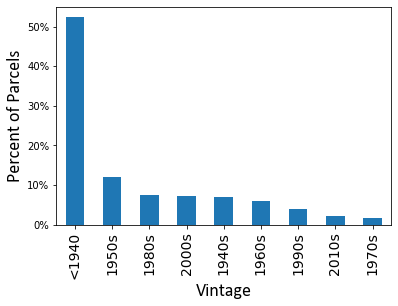

In [5]:
# Plot Vintage
ax = tax_parcels['vintage'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=titlesize,**labelfont)
plt.xlabel("Vintage",fontsize=titlesize,**labelfont)

Text(0, 0.5, 'Percent of Parcels')

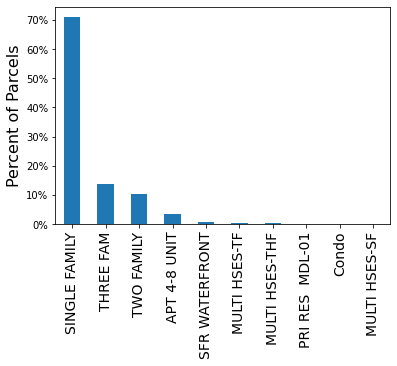

In [6]:
# Plot Family type
ax = tax_parcels['Family type'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

# the other one is persent of 'households' MK 

In [7]:
# Percent of Household

Text(0, 0.5, 'Percent of Parcels')

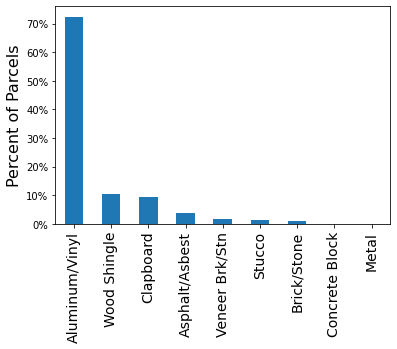

In [8]:
# Plot Siding
ax = tax_parcels['Siding'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

Text(0, 0.5, 'Percent of Parcels')

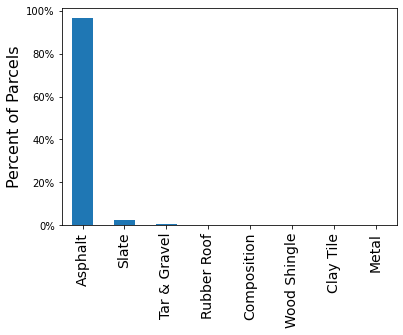

In [9]:
# Plot roof type
ax = tax_parcels['Roof Cover'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [10]:
# Less than 1% of homes have 'Tar & Gravel', 'Rubber Roof' or 'Clay Tile' so we are removing them

tax_parcels['Roof Material'] = ""

tax_parcels.loc[(tax_parcels['Roof Cover'] == 'Asphalt'), 'Roof Material'] = 'Asphalt Shingles, Medium'
tax_parcels.loc[(tax_parcels['Roof Cover'] == 'Composition'), 'Roof Material'] = 'Composition Shingles'
tax_parcels.loc[(tax_parcels['Roof Cover'] == 'Slate'), 'Roof Material'] = 'Slate'
tax_parcels.loc[(tax_parcels['Roof Cover'] == 'Metal'), 'Roof Material'] = 'Metal, Dark'
tax_parcels.loc[(tax_parcels['Roof Cover'] == 'Wood Shingle'), 'Roof Material'] = 'Wood Shingles'

# Less than 1% of homes have 'Tar & Gravel', 'Rubber Roof' or 'Clay Tile' so we are removing them
print(100*len(tax_parcels[tax_parcels['Roof Material'] == ""])/len(tax_parcels))
tax_parcels = tax_parcels[tax_parcels['Roof Material'] != ""]

0.7190998561800288


In [11]:
tax_parcels['floor_area'] = ""
tax_parcels.loc[(tax_parcels['Effective Area'] >=0) & (tax_parcels['Effective Area'] < 500), 'floor_area'] = '0-499'
tax_parcels.loc[(tax_parcels['Effective Area'] >=500) & (tax_parcels['Effective Area'] < 750), 'floor_area'] ='500-749'
tax_parcels.loc[(tax_parcels['Effective Area'] >=750) & (tax_parcels['Effective Area'] < 1000), 'floor_area'] ='750-999'
tax_parcels.loc[(tax_parcels['Effective Area'] >=1000) & (tax_parcels['Effective Area'] < 1500), 'floor_area'] ='1000-1499'
tax_parcels.loc[(tax_parcels['Effective Area'] >=1500) & (tax_parcels['Effective Area'] < 2000), 'floor_area'] ='1500-1999'
tax_parcels.loc[(tax_parcels['Effective Area'] >=2000) & (tax_parcels['Effective Area'] < 2500), 'floor_area'] ='2000-2499'
tax_parcels.loc[(tax_parcels['Effective Area'] >=2500) & (tax_parcels['Effective Area'] < 3000), 'floor_area'] ='2500-2999'
tax_parcels.loc[(tax_parcels['Effective Area'] >=3000) & (tax_parcels['Effective Area'] < 4000), 'floor_area'] ='3000-3999'
tax_parcels.loc[(tax_parcels['Effective Area'] >= 4000), 'floor_area'] = '4000+'

In [12]:
tax_parcels['floor_area_bin'] = ""
tax_parcels.loc[(tax_parcels['Effective Area'] >=0) & (tax_parcels['Effective Area'] < 1500), 'floor_area_bin'] ='0-1499'
tax_parcels.loc[(tax_parcels['Effective Area'] >=1500) & (tax_parcels['Effective Area'] < 2500), 'floor_area_bin'] ='1500-2499'
tax_parcels.loc[(tax_parcels['Effective Area'] >=2500) & (tax_parcels['Effective Area'] <  4000), 'floor_area_bin'] ='2500-3999'
tax_parcels.loc[(tax_parcels['Effective Area'] >= 4000), 'floor_area_bin'] = '4000+'

Text(0, 0.5, 'Percent of Parcels')

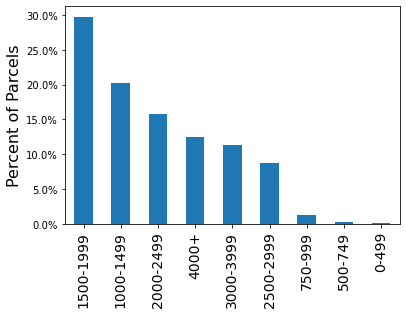

In [13]:
# Plot floor area
order = ['0-499','500-749','750-999','1000-1499','1500-1999','2000-2499','2500-2999','3000-3999','4000+']
ax = tax_parcels['floor_area'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [14]:
#probabilities
p_u1940 = len(tax_parcels[tax_parcels['vintage'] == "<1940"])/len(tax_parcels)
p_1940s = len(tax_parcels[tax_parcels['vintage'] == "1940s"])/len(tax_parcels)
p_1950s = len(tax_parcels[tax_parcels['vintage'] == "1950s"])/len(tax_parcels)
p_1960s = len(tax_parcels[tax_parcels['vintage'] == "1960s"])/len(tax_parcels)
p_1970s = len(tax_parcels[tax_parcels['vintage'] == "1970s"])/len(tax_parcels)
p_1980s = len(tax_parcels[tax_parcels['vintage'] == "1980s"])/len(tax_parcels)
p_1990s = len(tax_parcels[tax_parcels['vintage'] == "1990s"])/len(tax_parcels)
p_2000s = len(tax_parcels[tax_parcels['vintage'] == "2000s"])/len(tax_parcels)
p_2010s = len(tax_parcels[tax_parcels['vintage'] == "2010s"])/len(tax_parcels)

p_Single = len(tax_parcels[tax_parcels['Family type'] == "SINGLE FAMILY"])/len(tax_parcels)
p_Two = len(tax_parcels[tax_parcels['Family type'] == "TWO FAMILY"])/len(tax_parcels)
p_Three = len(tax_parcels[tax_parcels['Family type'] == "THREE FAMILY"])/len(tax_parcels)

p_siding_Vinyl = len(tax_parcels[tax_parcels['Siding'] == "Aluminum/Vinyl"])/len(tax_parcels)
p_siding_Asphalt = len(tax_parcels[tax_parcels['Siding'] == "Asphalt/Asbest"])/len(tax_parcels)
p_siding_Brick = len(tax_parcels[tax_parcels['Siding'] == "Brick/Stone"])/len(tax_parcels)
p_siding_Clapboard = len(tax_parcels[tax_parcels['Siding'] == "Clapboard"])/len(tax_parcels)
p_siding_Concrete = len(tax_parcels[tax_parcels['Siding'] == "Concrete Block"])/len(tax_parcels)
p_siding_Metal = len(tax_parcels[tax_parcels['Siding'] == "Metal"])/len(tax_parcels)
p_siding_Stucco = len(tax_parcels[tax_parcels['Siding'] == "Stucco"])/len(tax_parcels)
p_siding_Veneer = len(tax_parcels[tax_parcels['Siding'] == "Veneer Brk/Stn"])/len(tax_parcels)
p_siding_Wood = len(tax_parcels[tax_parcels['Siding'] == "Wood Shingle"])/len(tax_parcels)

p_roof_Asphalt = len(tax_parcels[tax_parcels['Roof Cover'] == "Asphalt"])/len(tax_parcels)
p_roof_Clay= len(tax_parcels[tax_parcels['Roof Cover'] == "Clay Tile"])/len(tax_parcels)
p_roof_Composition= len(tax_parcels[tax_parcels['Roof Cover'] == "Composition"])/len(tax_parcels)
p_roof_Metal= len(tax_parcels[tax_parcels['Roof Cover'] == "Metal"])/len(tax_parcels)
p_roof_Rubber= len(tax_parcels[tax_parcels['Roof Cover'] == "Rubber Roof"])/len(tax_parcels)
p_roof_Slate= len(tax_parcels[tax_parcels['Roof Cover'] == "Slate"])/len(tax_parcels)
p_roof_Tar= len(tax_parcels[tax_parcels['Roof Cover'] == "Tar & Gravel"])/len(tax_parcels)
p_roof_Wood= len(tax_parcels[tax_parcels['Roof Cover'] == "Wood Shingle"])/len(tax_parcels)

print(100*(p_siding_Metal + p_siding_Concrete + p_siding_Veneer))

1.7127762313242063


In [15]:
siding = tax_parcels.Siding.unique()
roof = tax_parcels['Roof Cover'].unique()

probability = pd.DataFrame(index=roof,columns=siding)

In [16]:
for eachSiding in siding:
    p_siding = len(tax_parcels[tax_parcels['Siding'] == eachSiding])/len(tax_parcels)
    for eachRoof in roof:
        p_roof = len(tax_parcels[tax_parcels['Roof Cover'] == eachRoof])/len(tax_parcels)
        probability.loc[eachRoof,eachSiding] = p_roof * p_siding

In [17]:
print(probability)

             Aluminum/Vinyl Asphalt/Asbest Clapboard    Stucco Brick/Stone  \
Asphalt            0.705162       0.038315  0.089274   0.01187     0.00737   
Composition        0.000866       0.000047   0.00011  0.000015    0.000009   
Slate              0.018157       0.000987  0.002299  0.000306     0.00019   
Wood Shingle       0.000845       0.000046  0.000107  0.000014    0.000009   
Metal              0.000556        0.00003   0.00007  0.000009    0.000006   

             Wood Shingle Veneer Brk/Stn Concrete Block     Metal  
Asphalt          0.103214       0.016121       0.000442  0.000083  
Composition      0.000127        0.00002       0.000001       0.0  
Slate            0.002658       0.000415       0.000011  0.000002  
Wood Shingle     0.000124       0.000019       0.000001       0.0  
Metal            0.000081       0.000013            0.0       0.0  


In [18]:
for eachSiding in siding:
    for eachRoof in roof:
        probability.loc[eachRoof,eachSiding] = len(tax_parcels[(tax_parcels['Roof Cover'] == eachRoof) & (tax_parcels['Siding'] == eachSiding)])/len(tax_parcels)

In [19]:
print(probability)

             Aluminum/Vinyl Asphalt/Asbest Clapboard    Stucco Brick/Stone  \
Asphalt            0.713458       0.037522  0.087031  0.010566    0.005198   
Composition        0.000682       0.000085  0.000199       0.0    0.000085   
Slate              0.010566       0.001676  0.004147  0.001591    0.002272   
Wood Shingle       0.000341       0.000114  0.000426  0.000057    0.000028   
Metal               0.00054       0.000028  0.000057       0.0         0.0   

             Wood Shingle Veneer Brk/Stn Concrete Block     Metal  
Asphalt           0.10288       0.014685       0.000426  0.000085  
Composition      0.000028       0.000085       0.000028       0.0  
Slate            0.003068       0.001704            0.0       0.0  
Wood Shingle     0.000142       0.000057            0.0       0.0  
Metal            0.000085       0.000057            0.0       0.0  


In [20]:
vintage = tax_parcels['vintage'].unique()
probability_2 = pd.DataFrame(index=vintage,columns=['Vintage'])

In [21]:
for eachVintage in vintage:
    sub_tax_parcel = tax_parcels[tax_parcels['vintage'] == eachVintage]
    for eachSiding in siding:
        p_siding = len(sub_tax_parcel[sub_tax_parcel['Siding'] == eachSiding])/len(sub_tax_parcel)
        for eachRoof in roof:
            p_roof = len(sub_tax_parcel[sub_tax_parcel['Roof Cover'] == eachRoof])/len(sub_tax_parcel)
            probability.loc[eachRoof,eachSiding] = p_roof * p_siding
    print(eachVintage)
    print(probability)

<1940
             Aluminum/Vinyl Asphalt/Asbest Clapboard    Stucco Brick/Stone  \
Asphalt            0.647529       0.065849  0.091144  0.017329    0.009518   
Composition        0.001187       0.000121  0.000167  0.000032    0.000017   
Slate              0.031534       0.003207  0.004439  0.000844    0.000464   
Wood Shingle       0.000705       0.000072  0.000099  0.000019     0.00001   
Metal              0.000519       0.000053  0.000073  0.000014    0.000008   

             Wood Shingle Veneer Brk/Stn Concrete Block     Metal  
Asphalt          0.107594       0.010811       0.000362  0.000052  
Composition      0.000197        0.00002       0.000001       0.0  
Slate             0.00524       0.000526       0.000018  0.000003  
Wood Shingle     0.000117       0.000012            0.0       0.0  
Metal            0.000086       0.000009            0.0       0.0  
1980s
             Aluminum/Vinyl Asphalt/Asbest Clapboard    Stucco Brick/Stone  \
Asphalt            0.745665      

In [22]:
tax_parcels['type_acs'] = "Single-Family Detached"

tax_parcels.loc[(tax_parcels['Bldg Style'] == "Multi Res 4-8 Units"), 'type_acs'] = "5 to 9 Unit"

tax_parcels.loc[(tax_parcels['Bldg Style'] == "Three Fam Conversion"), 'type_acs'] = "3 or 4 Unit"
tax_parcels.loc[(tax_parcels['Bldg Style'] == "Three Family"), 'type_acs'] = "3 or 4 Unit"

tax_parcels.loc[(tax_parcels['Bldg Style'] == "Two Family"), 'type_acs'] = "2 Unit"
tax_parcels.loc[(tax_parcels['Bldg Style'] == "Two Family Conversio"), 'type_acs'] = "2 Unit"
tax_parcels.loc[(tax_parcels['Bldg Style'] == "Half Duplex"), 'type_acs'] = "2 Unit" 
tax_parcels.loc[(tax_parcels['Bldg Style'] == "Duplex"), 'type_acs'] = "2 Unit"

tax_parcels.loc[(tax_parcels['Bldg Style'] == "Duplex"), 'type_acs'] = "2 Unit"

In [23]:
tax_parcels['Effective Area 2'] = ""

tax_parcels.loc[(tax_parcels['type_acs'] == "Single-Family Detached", 'Effective Area 2')] = tax_parcels.loc[(tax_parcels['type_acs'] == "Single-Family Detached")]['Effective Area'] 
tax_parcels.loc[(tax_parcels['type_acs'] == "2 Unit", 'Effective Area 2')] = tax_parcels.loc[(tax_parcels['type_acs'] == "2 Unit")]['Effective Area']/2
tax_parcels.loc[(tax_parcels['type_acs'] == "3 or 4 Unit", 'Effective Area 2')] = tax_parcels.loc[(tax_parcels['type_acs'] == "3 or 4 Unit")]['Effective Area']/3.5
tax_parcels.loc[(tax_parcels['type_acs'] == "5 to 9 Unit", 'Effective Area 2')] = tax_parcels.loc[(tax_parcels['type_acs'] == "5 to 9 Unit")]['Effective Area']/7

In [24]:
print(tax_parcels['Effective Area'][3])
print(tax_parcels['type_acs'][3])
print(tax_parcels['Effective Area 2'][3])
print(tax_parcels.loc[(tax_parcels['type_acs'] == "Single-Family Detached")]['Effective Area'] )
#

1829.0
Single-Family Detached
1829.0
3        1829.0
8        2432.0
12       2020.0
14       2738.0
16       1587.0
          ...  
35345    2207.0
35346    1624.0
35347    1095.0
35348    1155.0
35349    1424.0
Name: Effective Area, Length: 22915, dtype: float64


In [25]:
tax_parcels['floor_area_bin 2'] = ""
tax_parcels.loc[(tax_parcels['Effective Area 2'] >= 0) & (tax_parcels['Effective Area 2'] < 1500), 'floor_area_bin 2'] ='0-1499'
tax_parcels.loc[(tax_parcels['Effective Area 2'] >= 1500) & (tax_parcels['Effective Area 2'] < 2500), 'floor_area_bin 2'] ='1500-2499'
tax_parcels.loc[(tax_parcels['Effective Area 2'] >= 2500) & (tax_parcels['Effective Area 2'] <  4000), 'floor_area_bin 2'] ='2500-3999'
tax_parcels.loc[(tax_parcels['Effective Area 2'] >= 4000), 'floor_area_bin 2'] = '4000+'

In [26]:
tax_parcels['Effective Area 2']

0            1800.0
1            1493.5
2        565.428571
3            1829.0
4            1905.0
            ...    
35501         809.0
35502         819.0
35503         809.0
35504         809.0
35505         809.0
Name: Effective Area 2, Length: 35206, dtype: object

Text(0, 0.5, 'Percent of Parcels')

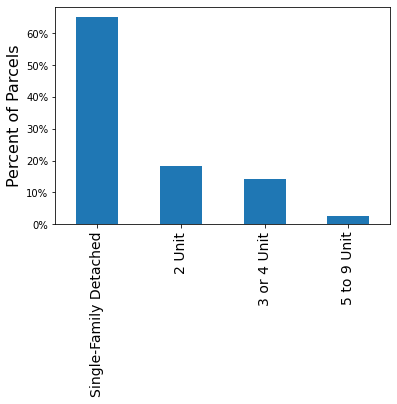

In [27]:
# Plot floor area
ax = tax_parcels['type_acs'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [28]:
tax_parcels['exterior finish'] = ""
tax_parcels.loc[(tax_parcels['Siding'] == 'Aluminum/Vinyl'), 'exterior finish'] = 'Vinyl, Light'
tax_parcels.loc[(tax_parcels['Siding'] == 'Asphalt/Asbest'), 'exterior finish'] = 'Shingle, Asbestos, Medium'
tax_parcels.loc[(tax_parcels['Siding'] == 'Stucco'), 'exterior finish'] = 'Stucco, Light'
tax_parcels.loc[(tax_parcels['Siding'] == 'Wood Shingle'), 'exterior finish'] = 'Wood, Medium/Dark'
tax_parcels.loc[(tax_parcels['Siding'] == 'Clapboard'), 'exterior finish'] = 'Wood, Medium/Dark'
tax_parcels.loc[(tax_parcels['Siding'] == 'Brick/Stone'), 'exterior finish'] = 'Brick, Medium/Dark'

# Less than 1.7% of homes have 'Veneer Brk/Stn' 'Concrete Block' or 'Metal'so we are removing them
print(100*len(tax_parcels[tax_parcels['exterior finish'] == ""])/len(tax_parcels))
tax_parcels = tax_parcels[tax_parcels['exterior finish'] != ""]    

1.712776231324206


Text(0, 0.5, 'Percent of Parcels')

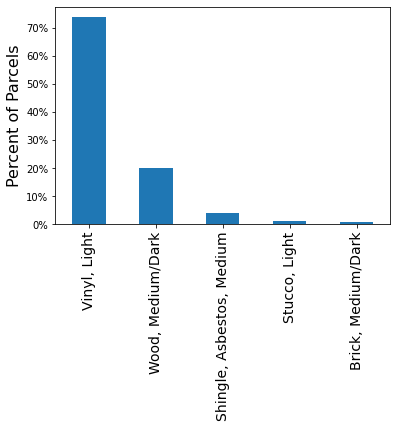

In [29]:
# Plot siding
ax = tax_parcels['exterior finish'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [30]:
print(len(tax_parcels)/og_parcels)

0.975804404839119


In [31]:
tax_parcels['Roof Cover'].unique()

array(['Asphalt', 'Composition', 'Slate', 'Wood Shingle', 'Metal'],
      dtype=object)

In [32]:
metadata['in.roof_material'].unique()

array(['Asphalt Shingles, Medium', 'Metal, Dark', 'Composition Shingles',
       'Wood Shingles', 'Slate'], dtype=object)

Text(0, 0.5, 'Percent of Parcels')

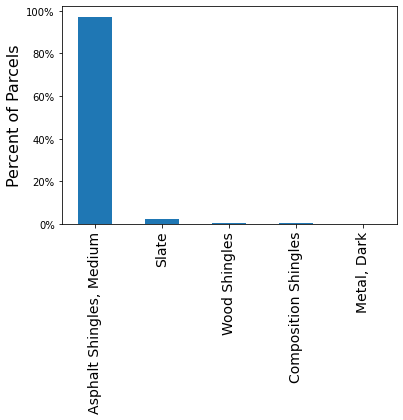

In [33]:
# Plot floor area
ax = tax_parcels['Roof Material'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [34]:
# vintage
# vintage + roof
# vintage + roof + siding
# vintage + roof + siding + area
print(metadata.loc[(metadata['in.roof_material'] == tax_parcels['Roof Material'][1]) & (metadata['in.geometry_wall_exterior_finish'] == tax_parcels['exterior finish'][1]) & (metadata['in.geometry_building_type_acs'] == tax_parcels['type_acs'][1]) & (metadata['in.geometry_floor_area_bin'] == tax_parcels['floor_area_bin 2'][1])]['bldg_id'])
# (metadata['in.geometry_floor_area'] == tax_parcels['floor_area'][1])
print(tax_parcels['vintage'][1])


16    22011
42    62353
Name: bldg_id, dtype: int64
<1940


In [35]:
metadata.loc[metadata['in.geometry_building_type_acs'] == '2 Unit']

,bldg_id,in.county,in.puma,in.ashrae_iecc_climate_zone_2004,in.building_america_climate_zone,in.iso_rto_region,applicability,weight,in.sqft,in.ahs_region,...,in.door_area_ft_2,in.duct_unconditioned_surface_area_ft_2,in.floor_area_attic_ft_2,in.floor_area_conditioned_ft_2,in.floor_area_lighting_ft_2,in.roof_area_ft_2,in.wall_area_above_grade_conditioned_ft_2,in.wall_area_above_grade_exterior_ft_2,in.wall_area_below_grade_ft_2,in.window_area_ft_2
3,9153,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1623.0,Non-CBSA New England,...,20.0,0.00,0.0,1623.0,1623.0,1623.0,1345.24,1345.24,0.00,161.43
16,22011,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,197.44,0.0,617.0,617.0,0.0,829.44,829.44,414.72,149.30
28,44383,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,0.00,0.0,1138.0,1138.0,1138.0,1126.45,1126.45,0.00,135.17
32,49140,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,272.96,0.0,853.0,853.0,853.0,661.78,661.78,330.89,39.71
42,62353,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,0.00,0.0,617.0,617.0,617.0,829.44,829.44,0.00,49.77
56,90245,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.0,975.25,975.25,975.25,117.03
65,107877,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,364.16,0.0,1138.0,1138.0,1138.0,764.38,764.38,382.19,114.66
81,131583,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,272.96,0.0,853.0,853.0,0.0,975.25,975.25,975.25,87.77
82,132722,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,0.00,0.0,1138.0,1138.0,0.0,1126.45,1126.45,0.00,168.97
88,144983,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,333.0,Non-CBSA New England,...,20.0,106.56,0.0,333.0,333.0,0.0,609.35,609.35,609.35,91.40


In [36]:
metadata['in.geometry_building_type_acs'].unique()

array(['Single-Family Detached', '2 Unit', '3 or 4 Unit', '5 to 9 Unit',
       'Single-Family Attached', '10 to 19 Unit', '50 or more Unit',
       '20 to 49 Unit', 'Mobile Home'], dtype=object)

In [37]:
oldies = metadata.loc[metadata['in.vintage']=='1940s']
oldies = oldies.loc[oldies['in.roof_material']=='Asphalt Shingles, Medium']
oldies = oldies.loc[oldies['in.geometry_building_type_acs'] == 'Single-Family Detached']
oldies = oldies.loc[oldies['in.geometry_floor_area_bin']== '0-1499']
oldies = oldies.loc[oldies['in.geometry_wall_exterior_finish']== 'Vinyl, Light']

print(oldies)

    bldg_id in.county    in.puma in.ashrae_iecc_climate_zone_2004  \
22    32763  G2500270  G25000300                               5A   

   in.building_america_climate_zone in.iso_rto_region  applicability  \
22                             Cold             NEISO           True   

        weight  in.sqft         in.ahs_region  ...  in.door_area_ft_2  \
22  242.131013   1220.0  Non-CBSA New England  ...               20.0   

   in.duct_unconditioned_surface_area_ft_2  in.floor_area_attic_ft_2  \
22                                   390.4                    1220.0   

   in.floor_area_conditioned_ft_2 in.floor_area_lighting_ft_2  \
22                         1220.0                      1220.0   

   in.roof_area_ft_2 in.wall_area_above_grade_conditioned_ft_2  \
22            1364.0                                   1166.33   

   in.wall_area_above_grade_exterior_ft_2 in.wall_area_below_grade_ft_2  \
22                                1335.78                       1166.33   

   in.win

In [38]:
tax_oldies = tax_parcels.loc[tax_parcels['vintage']=='1940s']
tax_oldies = tax_oldies.loc[tax_oldies['Roof Material']=='Asphalt Shingles, Medium']
tax_oldies = tax_oldies.loc[tax_oldies['type_acs']=='Single-Family Detached']
tax_oldies = tax_oldies.loc[tax_oldies['floor_area_bin'] == "0-1499"]
tax_oldies = tax_oldies.loc[tax_oldies['exterior finish'] == "Vinyl, Light"]


In [71]:
print(tax_oldies.head())

        AYB      Family type Bldg Style  Effective Area          Siding  \
127  1942.0    SINGLE FAMILY   Cape Cod          1364.0  Aluminum/Vinyl   
128  1942.0    SINGLE FAMILY   Cape Cod          1137.0  Aluminum/Vinyl   
129  1942.0    SINGLE FAMILY   Colonial          1399.0  Aluminum/Vinyl   
130  1942.0    SINGLE FAMILY   Cape Cod          1298.0  Aluminum/Vinyl   
131  1942.0  PRI RES  MDL-01   Colonial          1540.0  Aluminum/Vinyl   

    Roof Cover vintage             Roof Material floor_area floor_area_bin  \
127    Asphalt   1940s  Asphalt Shingles, Medium  1000-1499         0-1499   
128    Asphalt   1940s  Asphalt Shingles, Medium  1000-1499         0-1499   
129    Asphalt   1940s  Asphalt Shingles, Medium  1000-1499         0-1499   
130    Asphalt   1940s  Asphalt Shingles, Medium  1000-1499         0-1499   
131    Asphalt   1940s  Asphalt Shingles, Medium  1500-1999      1500-2499   

                   type_acs Effective Area 2 floor_area_bin 2 exterior finish  \

In [43]:
metadata.columns

Index(['bldg_id', 'in.county', 'in.puma', 'in.ashrae_iecc_climate_zone_2004',
       'in.building_america_climate_zone', 'in.iso_rto_region',
       'applicability', 'weight', 'in.sqft', 'in.ahs_region',
       ...
       'in.door_area_ft_2', 'in.duct_unconditioned_surface_area_ft_2',
       'in.floor_area_attic_ft_2', 'in.floor_area_conditioned_ft_2',
       'in.floor_area_lighting_ft_2', 'in.roof_area_ft_2',
       'in.wall_area_above_grade_conditioned_ft_2',
       'in.wall_area_above_grade_exterior_ft_2',
       'in.wall_area_below_grade_ft_2', 'in.window_area_ft_2'],
      dtype='object', length=274)

In [45]:
metadata['in.geometry_building_type_acs'].unique()

array(['Single-Family Detached', '2 Unit', '3 or 4 Unit', '5 to 9 Unit',
       'Single-Family Attached', '10 to 19 Unit', '50 or more Unit',
       '20 to 49 Unit', 'Mobile Home'], dtype=object)

In [47]:
tax_parcels['Family type'].unique()

array(['TWO FAMILY', 'THREE FAM', 'SINGLE FAMILY', 'APT 4-8 UNIT',
       'PRI RES  MDL-01', 'MULTI HSES-THF', 'MULTI HSES-TF',
       'MULTI HSES-SF', 'SFR WATERFRONT', 'Condo'], dtype=object)

In [48]:
tax_parcels['Bldg Style'].unique()

array(['Two Family', 'Three Fam Conversion', 'Conventional',
       'Two Family Conversio', 'Multi Res 4-8 Units', 'Three Family',
       'Raised Ranch', 'Ranch', 'Half Duplex', 'Duplex', 'Colonial',
       'Bungalow', 'Cape Cod', 'Tudor', 'Modern', 'Split Level',
       'Victorian', 'Raised Cape'], dtype=object)

In [59]:
# for each_parcel in tax_parcels:
# tax_pacels.loc[tax_parcels['Bldg Style'] == ]
tax_parcels.loc[tax_parcels['Bldg Style'].isin(['Conventional', 'Raised Ranch', 'Ranch','Colonial','Bungalow','Cape Cod','Tudor','Modern','Split Level','Victorian','Raised Cape']),"ACS Type"] = "Single Family Detached"
tax_parcels.loc[tax_parcels['Bldg Style'].isin(['Two Family', 'Two Family Conversio', 'Half Duplex', 'Duplex']),"ACS Type"] = "2 Unit"
tax_parcels.loc[tax_parcels['Bldg Style'].isin(['Three Fam Conversion', 'Three Family']),"ACS Type"] = '3 or 4 Unit'
tax_parcels.loc[tax_parcels['Bldg Style'].isin(['Multi Res 4-8 Units']),"ACS Type"] = '5 to 9 Unit'


Text(0, 0.5, 'Percent of Parcels')

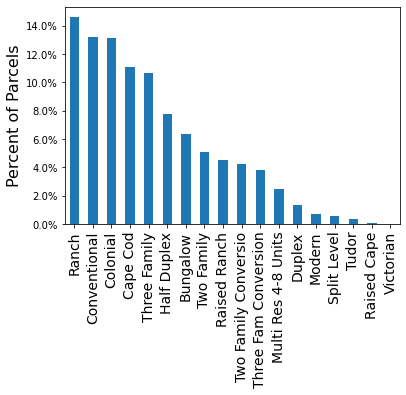

In [60]:
ax = tax_parcels['Bldg Style'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

Text(0, 0.5, 'Percent of Parcels')

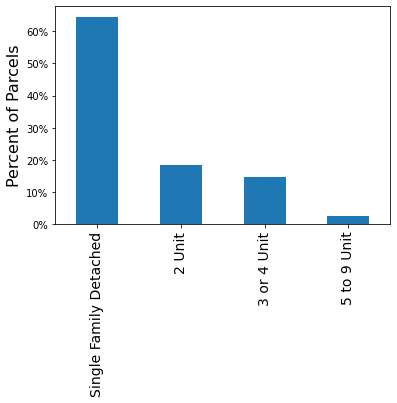

In [61]:
ax = tax_parcels['ACS Type'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(horizontalalignment="center", fontsize=14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Percent of Parcels", fontsize=16)

In [62]:
each_parcel = tax_parcels.iloc[0]
metadata.loc[(metadata['in.vintage']==each_parcel['vintage'])]

,bldg_id,in.county,in.puma,in.ashrae_iecc_climate_zone_2004,in.building_america_climate_zone,in.iso_rto_region,applicability,weight,in.sqft,in.ahs_region,...,in.door_area_ft_2,in.duct_unconditioned_surface_area_ft_2,in.floor_area_attic_ft_2,in.floor_area_conditioned_ft_2,in.floor_area_lighting_ft_2,in.roof_area_ft_2,in.wall_area_above_grade_conditioned_ft_2,in.wall_area_above_grade_exterior_ft_2,in.wall_area_below_grade_ft_2,in.window_area_ft_2
1,3104,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,2176.0,Non-CBSA New England,...,20.0,696.32,2176.0,2176.0,2176.0,2432.84,1557.65,1859.88,778.83,280.38
3,9153,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1623.0,Non-CBSA New England,...,20.0,0.00,0.0,1623.0,1623.0,1623.00,1345.24,1345.24,0.00,161.43
4,10160,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,197.44,0.0,617.0,617.0,0.00,829.44,829.44,829.44,99.53
6,12954,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.00,975.25,975.25,0.00,87.77
7,13107,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,0.00,0.0,617.0,617.0,0.00,562.83,562.83,0.00,101.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,534041,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.00,975.25,975.25,487.63,117.03
310,536627,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1690.0,Non-CBSA New England,...,20.0,0.00,845.0,1690.0,1690.0,944.74,970.67,1088.03,970.67,87.36
312,539770,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,885.0,Non-CBSA New England,...,20.0,0.00,295.0,885.0,885.0,329.82,1147.05,1188.02,573.53,137.65
313,544793,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1220.0,Non-CBSA New England,...,20.0,0.00,610.0,1220.0,1220.0,682.00,1649.44,1734.16,412.36,247.42


In [63]:
each_parcel = tax_parcels.iloc[0]
metadata.loc[metadata['in.geometry_building_type_acs'] == each_parcel['ACS Type']]

,bldg_id,in.county,in.puma,in.ashrae_iecc_climate_zone_2004,in.building_america_climate_zone,in.iso_rto_region,applicability,weight,in.sqft,in.ahs_region,...,in.door_area_ft_2,in.duct_unconditioned_surface_area_ft_2,in.floor_area_attic_ft_2,in.floor_area_conditioned_ft_2,in.floor_area_lighting_ft_2,in.roof_area_ft_2,in.wall_area_above_grade_conditioned_ft_2,in.wall_area_above_grade_exterior_ft_2,in.wall_area_below_grade_ft_2,in.window_area_ft_2
3,9153,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1623.0,Non-CBSA New England,...,20.0,0.00,0.0,1623.0,1623.0,1623.0,1345.24,1345.24,0.00,161.43
16,22011,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,197.44,0.0,617.0,617.0,0.0,829.44,829.44,414.72,149.30
28,44383,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,0.00,0.0,1138.0,1138.0,1138.0,1126.45,1126.45,0.00,135.17
32,49140,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,272.96,0.0,853.0,853.0,853.0,661.78,661.78,330.89,39.71
42,62353,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,0.00,0.0,617.0,617.0,617.0,829.44,829.44,0.00,49.77
56,90245,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.0,975.25,975.25,975.25,117.03
65,107877,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,364.16,0.0,1138.0,1138.0,1138.0,764.38,764.38,382.19,114.66
81,131583,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,272.96,0.0,853.0,853.0,0.0,975.25,975.25,975.25,87.77
82,132722,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,0.00,0.0,1138.0,1138.0,0.0,1126.45,1126.45,0.00,168.97
88,144983,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,333.0,Non-CBSA New England,...,20.0,106.56,0.0,333.0,333.0,0.0,609.35,609.35,609.35,91.40


In [64]:
each_parcel = tax_parcels.iloc[0]
metadata.loc[(metadata['in.geometry_building_type_acs'] == each_parcel['ACS Type']) & (metadata['in.vintage']==each_parcel['vintage'])]

,bldg_id,in.county,in.puma,in.ashrae_iecc_climate_zone_2004,in.building_america_climate_zone,in.iso_rto_region,applicability,weight,in.sqft,in.ahs_region,...,in.door_area_ft_2,in.duct_unconditioned_surface_area_ft_2,in.floor_area_attic_ft_2,in.floor_area_conditioned_ft_2,in.floor_area_lighting_ft_2,in.roof_area_ft_2,in.wall_area_above_grade_conditioned_ft_2,in.wall_area_above_grade_exterior_ft_2,in.wall_area_below_grade_ft_2,in.window_area_ft_2
3,9153,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1623.0,Non-CBSA New England,...,20.0,0.00,0.0,1623.0,1623.0,1623.0,1345.24,1345.24,0.00,161.43
28,44383,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,0.00,0.0,1138.0,1138.0,1138.0,1126.45,1126.45,0.00,135.17
56,90245,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.0,975.25,975.25,975.25,117.03
65,107877,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,1138.0,Non-CBSA New England,...,20.0,364.16,0.0,1138.0,1138.0,1138.0,764.38,764.38,382.19,114.66
81,131583,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,272.96,0.0,853.0,853.0,0.0,975.25,975.25,975.25,87.77
88,144983,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,333.0,Non-CBSA New England,...,20.0,106.56,0.0,333.0,333.0,0.0,609.35,609.35,609.35,91.40
92,153246,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,333.0,Non-CBSA New England,...,20.0,106.56,0.0,333.0,333.0,0.0,609.35,609.35,609.35,73.12
106,176517,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,197.44,0.0,617.0,617.0,617.0,562.83,562.83,562.83,101.31
113,187266,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,853.0,Non-CBSA New England,...,20.0,0.00,0.0,853.0,853.0,0.0,975.25,975.25,975.25,117.03
139,237797,G2500270,G25000300,5A,Cold,NEISO,True,242.131013,617.0,Non-CBSA New England,...,20.0,0.00,0.0,617.0,617.0,0.0,829.44,829.44,0.00,124.42


In [ ]:
tax_parcels['']